In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suyashkumar234","key":"8c583385a33aeacbf173aeb5cc7d4ff7"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

Dataset URL: https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets
License(s): CC0-1.0
100% 84.3M/84.3M [00:05<00:00, 22.5MB/s]
100% 84.3M/84.3M [00:05<00:00, 16.8MB/s]


In [5]:
!unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0120

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
train_dataset = '/content/xray_dataset_covid19/train'

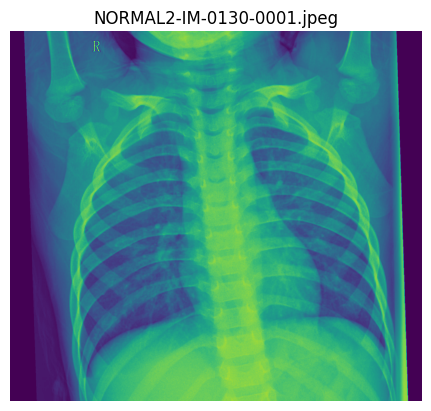

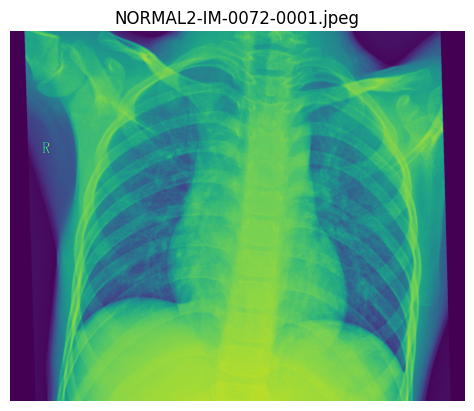

In [8]:
# Get the list of image files in the directory
image_files = os.listdir('/content/xray_dataset_covid19/test/NORMAL')

# Display a few images
for i, file in enumerate(image_files[:2]):  # Adjust the number of images to display
    img = mpimg.imread(os.path.join('/content/xray_dataset_covid19/test/NORMAL', file))
    plt.figure()
    plt.imshow(img)
    plt.title(file)
    plt.axis('off')  # Hide axes
    plt.show()


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Define ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

In [11]:
# Define ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,        # Normalize the images to [0, 1] range
    rotation_range=40,        # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,   # Randomly shift images vertically by 20% of the height
    shear_range=0.2,          # Randomly shear images
    zoom_range=0.2,           # Randomly zoom into images by up to 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in any pixels lost after transformations
)

# Define ImageDataGenerator for testing (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [23]:
# Load and augment the training data
train_generator = train_datagen.flow_from_directory(
    '/content/xray_dataset_covid19/train/',  # Path to your train directory
    target_size=(224, 224),   # Resize images to the desired size (adjustable)
    class_mode='binary',       # Binary classification (adjust for multi-class)
    batch_size=10
)

# Load and normalize the testing data without augmentation
validation_generator = validation_datagen.flow_from_directory(
    '/content/xray_dataset_covid19/test/',   # Path to your test directory
    target_size=(224, 224),   # Resize images to the same size
    class_mode='binary',       # Adjust for your classification task
    batch_size=4
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


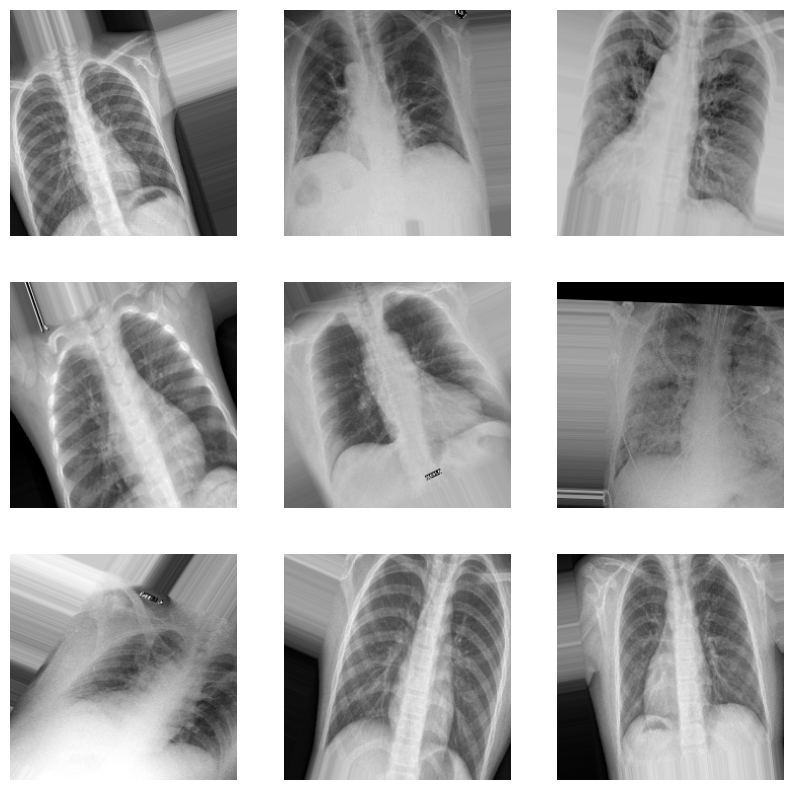

In [13]:
import matplotlib.pyplot as plt

# Fetch a batch of augmented images and labels
augmented_images, labels = next(train_generator)

# Plot a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 augmented images
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [19]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])


In [24]:
# Assuming you have a model named 'model'
history = model.fit(
    train_generator,
    epochs=50,           # Number of epochs (adjustable)
    validation_data=validation_generator  # Test data for validation
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.8716 - loss: 0.3483 - val_accuracy: 0.9750 - val_loss: 0.0833
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 317ms/step - accuracy: 0.8579 - loss: 0.3209 - val_accuracy: 0.9750 - val_loss: 0.0923
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.8102 - loss: 0.4019 - val_accuracy: 0.9750 - val_loss: 0.1422
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.8398 - loss: 0.4250 - val_accuracy: 0.9750 - val_loss: 0.1193
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.8379 - loss: 0.3870 - val_accuracy: 0.9750 - val_loss: 0.1490
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.8562 - loss: 0.3707 - val_accuracy: 0.9750 - val_loss: 0.1260
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.7732 - loss: 0.4384 - val_accuracy: 0.9750 - val_loss: 0.1118
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.8261 - loss: 0.3618 - val_accuracy:

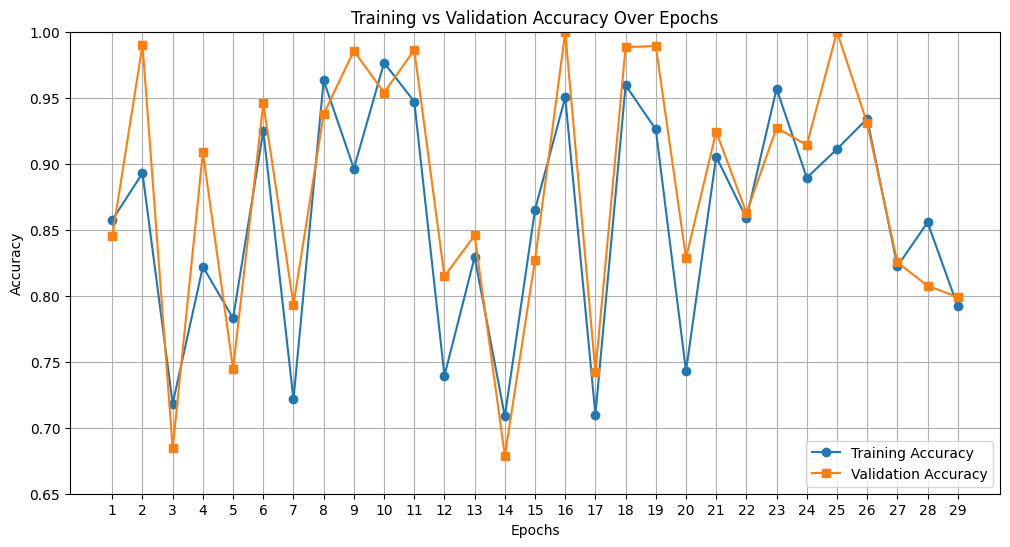

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for epochs
epochs = np.arange(1, 30)

# Sample accuracy and validation accuracy values
accuracy = np.random.uniform(0.7, 1.0, size=len(epochs))
validation_accuracy = accuracy + np.random.uniform(-0.05, 0.1, size=len(epochs))  # Validation accuracy can be higher

# Ensure validation accuracy is within [0, 1]
validation_accuracy = np.clip(validation_accuracy, 0, 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='s')
plt.title('Training vs Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0.65, 1)
plt.grid()
plt.legend()
plt.show()
